In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import pickle
import warnings
warnings.filterwarnings('ignore')

sys.path.append('utils')
from plot_utils import fast_plot, fast_hist, fast_legend, feature_snapshot

plt.rcParams.update({'figure.max_open_warning': 0})
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)

# Загрузка данных

In [2]:
%%time   

with open('../data/processed/data_sorted.pcl', 'rb') as f:
    data = pickle.load(f)

Wall time: 48.7 s


# Подвыборка для обучения
* Для сокращения времени обучения возьмем в подвыборку каждый 100 объект 
* Предварительно необходимо провести сортирувку по ключевым параметрам

In [3]:
data.head(2)

Segment gamecategory subgamecategory                   bundle  \
7725614         1      missing         missing             com.fugo.wow   
32183155        1      missing         missing  com.ohmgames.knockdolls   

                     created    shift   oblast     city       os     osv  \
7725614  2021-07-05 00:04:20  missing  missing  missing  Android  11.0.0   
32183155 2021-07-05 00:04:36  missing  missing  missing  Android  10.0.0   

          hour_shift          local_time  month        date  day  wd  hour  \
7725614            0 2021-07-05 00:04:20      7  2021-07-05    5   0     0   
32183155           0 2021-07-05 00:04:36      7  2021-07-05    5   0     0   

          minutes  
7725614         4  
32183155        4

In [4]:
%%time
data = data.sort_values(['Segment', 'os', 'gamecategory', 'subgamecategory', 'oblast', 'local_time'])

Wall time: 57.3 s


In [5]:
with open('../data/processed/data_sorted.pcl', 'wb') as f:
    pickle.dump(data, f)

In [6]:
parts = 100
short_idx = [x for x in range(data.shape[0]) if x%parts == 0]
short_data = data.iloc[short_idx]
short_data

Segment gamecategory subgamecategory                       bundle  \
7725614         1      missing         missing                 com.fugo.wow   
594865          1      missing         missing                 com.fugo.wow   
27040084        1      missing         missing                     com.atpc   
11257224        1      missing         missing  com.tile.match.connect.game   
26467526        1      missing         missing   com.Upperpik.HairChallenge   
...           ...          ...             ...                          ...   
6978727         5      missing         missing                   1573385326   
31660490        5      missing         missing                    400201466   
41085213        5      missing         missing                   1475056821   
19208692        5      missing         missing                   1205558961   
44150052        5      missing         missing                   1450264153   

                     created    shift               oblast            city  \
7725614  2021-07-05 00:04:20  missing              missing         missing   
594865   2021-07-05 01:02:42  missing              missing         missing   
27040084 2021-07-05 01:37:57  missing              missing         missing   
11257224 2021-07-05 02:16:49  missing              missing         missing   
26467526 2021-07-05 02:36:56  missing              missing         missing   
...                      ...      ...                  ...             ...   
6978727  2021-09-18 17:41:38      MSK  Ярославская область       Ярославль   
31660490 2021-09-18 23:41:47      MSK  Ярославская область       Ярославль   
41085213 2021-09-19 19:50:35      MSK  Ярославская область       Ярославль   
19208692 2021-09-20 13:52:37      MSK  Ярославская область       Ярославль   
44150052 2021-09-20 19:55:22      MSK  Ярославская область  Борисоглебский   

               os     osv  hour_shift          local_time  month        date  \
7725614   Android  11.0.0           0 2021-07-05 00:04:20      7  2021-07-05   
594865    Android  10.0.0           0 2021-07-05 01:02:42      7  2021-07-05   
27040084  Android   7.0.0           0 2021-07-05 01:37:57      7  2021-07-05   
11257224  Android   5.1.1           0 2021-07-05 02:16:49      7  2021-07-05   
26467526  Android  10.0.0           0 2021-07-05 02:36:56      7  2021-07-05   
...           ...     ...         ...                 ...    ...         ...   
6978727       ios  12.5.4           0 2021-09-18 17:41:38      9  2021-09-18   
31660490      ios  14.7.1           0 2021-09-18 23:41:47      9  2021-09-18   
41085213      ios  12.5.4           0 2021-09-19 19:50:35      9  2021-09-19   
19208692      ios  14.7.1           0 2021-09-20 13:52:37      9  2021-09-20   
44150052      ios  14.7.1           0 2021-09-20 19:55:22      9  2021-09-20   

          day  wd  hour  minutes  
7725614     5   0     0        4  
594865      5   0     1        2  
27040084    5   0     1       37  
11257224    5   0     2       16  
26467526    5   0     2       36  
...       ...  ..   ...      ...  
6978727    18   5    17       41  
31660490   18   5    23       41  
41085213   19   6    19       50  
19208692   20   0    13       52  
44150052   20   0    19       55  

[448543 rows x 18 columns]

In [7]:
short_data['Segment'].value_counts()

5    171874
3    141870
4    111420
2     14162
1      9217
Name: Segment, dtype: int64

In [8]:
short_data['gamecategory'].value_counts()

Games                 245552
missing               169611
Applications           27424
Lifestyle               2673
Shopping                1848
Entertainment            317
Social Networking        290
Education                268
Book                     235
Photo & Video            103
Utilities                 76
Music                     44
IAB9-30                   35
Health & Fitness          15
Productivity              14
Finance                   12
Travel                     8
Sports                     5
Navigation                 4
Reference                  2
IAB9,IAB9-30,games         2
Business                   2
Food & Drink               1
Graphics & Design          1
Medical                    1
Name: gamecategory, dtype: int64

In [9]:
short_data['subgamecategory'].value_counts()

missing                    169681
Puzzle                      46916
Action                      34127
Casual                      32427
Simulation                  27571
Word                        18279
Arcade                      13728
Strategy                    12764
Role Playing                12023
Card                        10418
Board                        8836
Racing                       8124
Adventure                    7363
Tools                        6669
None                         6476
Sports                       5761
Dating                       2969
Shopping                     2880
Music                        2870
Productivity                 2228
Entertainment                2190
Books & Reference            2115
Health & Fitness             1765
Video Players & Editors      1512
Casino                       1491
Trivia                       1342
Music & Audio                1156
Education                     864
Family                        776
Social        

In [10]:
with open('../data/processed/short_data.pcl', 'wb') as f:
    pickle.dump(short_data, f)

## Анализ признаков

In [11]:
with open('../data/processed/short_data.pcl', 'rb') as f:
    data = pickle.load(f)

In [12]:
%%time
data.nunique()

Wall time: 323 ms


Segment                 5
gamecategory           25
subgamecategory        51
bundle              16631
created            364187
shift                  12
oblast                 86
city                 1999
os                      4
osv                   182
hour_shift             11
local_time         367485
month                   3
date                   26
day                    20
wd                      7
hour                   24
minutes                60
dtype: int64

In [13]:
data_rows = data.shape[0]
(data['gamecategory'].value_counts() / data_rows).cumsum()

Games                 0.547444
missing               0.925581
Applications          0.986721
Lifestyle             0.992681
Shopping              0.996801
Entertainment         0.997507
Social Networking     0.998154
Education             0.998752
Book                  0.999275
Photo & Video         0.999505
Utilities             0.999675
Music                 0.999773
IAB9-30               0.999851
Health & Fitness      0.999884
Productivity          0.999915
Finance               0.999942
Travel                0.999960
Sports                0.999971
Navigation            0.999980
Reference             0.999984
IAB9,IAB9-30,games    0.999989
Business              0.999993
Food & Drink          0.999996
Graphics & Design     0.999998
Medical               1.000000
Name: gamecategory, dtype: float64

In [14]:
mask = data['gamecategory'] == 'Applications'
data['subgamecategory'][mask].value_counts()

Tools                      6669
Dating                     2969
Shopping                   2880
Productivity               2228
Entertainment              2188
Books & Reference          2115
Health & Fitness           1765
Video Players & Editors    1512
Music & Audio              1156
Education                   864
Social                      631
Personalization             433
Weather                     397
Communication               396
Photography                 250
Beauty                      210
Finance                     206
Lifestyle                   179
Food & Drink                 66
Sports                       52
Maps & Navigation            48
Business                     41
Travel & Local               40
Auto & Vehicles              35
Art & Design                 31
Comics                       23
House & Home                 15
Libraries & Demo             11
Events                        7
News & Magazines              5
Parenting                     2
Name: su

In [15]:
mask = data['gamecategory'] == 'Games'
data['subgamecategory'][mask].value_counts()

Puzzle           46916
Action           34127
Casual           32427
Simulation       27571
Word             18279
Arcade           13728
Strategy         12764
Role Playing     12023
Card             10418
Board             8836
Racing            8124
Adventure         7363
Sports            5709
Music             2870
Casino            1491
Trivia            1342
Family             776
None               562
Educational        192
missing             33
Entertainment        1
Name: subgamecategory, dtype: int64

In [16]:
mask = data['subgamecategory'] == 'Dating'
data[mask]

Segment  gamecategory subgamecategory                 bundle  \
15163364        1  Applications          Dating       com.badoo.mobile   
17442325        1  Applications          Dating  ru.photostrana.mobile   
35384152        1  Applications          Dating  ru.photostrana.mobile   
13391430        1  Applications          Dating       com.badoo.mobile   
20468699        1  Applications          Dating  ru.photostrana.mobile   
...           ...           ...             ...                    ...   
12266755        5  Applications          Dating  ru.photostrana.mobile   
1128855         5  Applications          Dating       com.badoo.mobile   
1809328         5  Applications          Dating       com.badoo.mobile   
41583512        5  Applications          Dating  ru.photostrana.mobile   
34893598        5  Applications          Dating  ru.photostrana.mobile   

                     created    shift                 oblast         city  \
15163364 2021-07-06 14:42:38  missing                missing      missing   
17442325 2021-07-09 11:10:08  missing                missing      missing   
35384152 2021-07-11 17:50:08    MSK+3         Алтайский край      Барнаул   
13391430 2021-07-09 15:25:27      MSK  Волгоградская область    Волгоград   
20468699 2021-07-06 17:36:27      MSK      Калужская область       Калуга   
...                      ...      ...                    ...          ...   
12266755 2021-08-02 13:09:49      MSK    Ярославская область  Семибратово   
1128855  2021-08-03 08:47:16      MSK    Ярославская область    Ярославль   
1809328  2021-08-04 11:01:41      MSK    Ярославская область    Ярославль   
41583512 2021-08-08 07:03:31      MSK    Ярославская область    Ярославль   
34893598 2021-09-17 18:27:53      MSK    Ярославская область    Ярославль   

               os    osv  hour_shift          local_time  month        date  \
15163364  android   10.0           0 2021-07-06 14:42:38      7  2021-07-06   
17442325  android  8.1.0           0 2021-07-09 11:10:08      7  2021-07-09   
35384152  android   10.0           3 2021-07-11 20:50:08      7  2021-07-11   
13391430  android   11.0           0 2021-07-09 15:25:27      7  2021-07-09   
20468699  android   10.0           0 2021-07-06 17:36:27      7  2021-07-06   
...           ...    ...         ...                 ...    ...         ...   
12266755  android   10.0           0 2021-08-02 13:09:49      8  2021-08-02   
1128855   android  8.1.0           0 2021-08-03 08:47:16      8  2021-08-03   
1809328   android   10.0           0 2021-08-04 11:01:41      8  2021-08-04   
41583512  android    9.0           0 2021-08-08 07:03:31      8  2021-08-08   
34893598  android   11.0           0 2021-09-17 18:27:53      9  2021-09-17   

          day  wd  hour  minutes  
15163364    6   1    14       42  
17442325    9   4    11       10  
35384152   11   6    20       50  
13391430    9   4    15       25  
20468699    6   1    17       36  
...       ...  ..   ...      ...  
12266755    2   0    13        9  
1128855     3   1     8       47  
1809328     4   2    11        1  
41583512    8   6     7        3  
34893598   17   4    18       27  

[2969 rows x 18 columns]

In [17]:
mask.mean()

0.006619209306577073

In [18]:
data[mask]['bundle'].value_counts()

ru.photostrana.mobile        1891
com.badoo.mobile             1057
group.socialservice.hugme      14
com.cupichat.android            4
gbwhats.app.messenger           1
com.momex.livevideochat         1
com.hotornot.app                1
Name: bundle, dtype: int64

In [19]:
data_rows = data.shape[0]
(data['subgamecategory'].value_counts() / data_rows).cumsum()

missing                    0.378294
Puzzle                     0.482890
Action                     0.558974
Casual                     0.631268
Simulation                 0.692736
Word                       0.733488
Arcade                     0.764094
Strategy                   0.792551
Role Playing               0.819355
Card                       0.842581
Board                      0.862281
Racing                     0.880393
Adventure                  0.896808
Tools                      0.911676
None                       0.926114
Sports                     0.938958
Dating                     0.945577
Shopping                   0.951998
Music                      0.958396
Productivity               0.963364
Entertainment              0.968246
Books & Reference          0.972961
Health & Fitness           0.976896
Video Players & Editors    0.980267
Casino                     0.983591
Trivia                     0.986583
Music & Audio              0.989160
Education                  0

In [20]:
data_rows = data.shape[0]
(data['bundle'].value_counts() / data_rows).cumsum().head(20)

com.fugo.wow                                       0.037579
net.wargaming.wot.blitz                            0.062266
com.openmygame.games.android.wordpizza             0.082320
com.axlebolt.standoff2                             0.096553
com.yourstoryinteractive.sails.pirate.adventure    0.107566
com.smallgiantgames.empires                        0.117485
com.nexters.herowars                               0.127363
com.merge.cube.winner                              0.137019
sortpuz.water.sort.puzzle.game                     0.144871
com.kiloo.subwaysurf                               0.152405
com.fingerlab.word.blockpuzzles                    0.159887
com.openmygame.games.android.wordsearchsea         0.167239
com.iposedon.bricksbreakerballs                    0.174142
com.allgoritm.youla                                0.180536
1300588558                                         0.186477
351331194                                          0.192238
com.wb.goog.mkx                         

In [21]:
(data['bundle'].value_counts() / data_rows).cumsum().head(60)

com.fugo.wow                                          0.037579
net.wargaming.wot.blitz                               0.062266
com.openmygame.games.android.wordpizza                0.082320
com.axlebolt.standoff2                                0.096553
com.yourstoryinteractive.sails.pirate.adventure       0.107566
com.smallgiantgames.empires                           0.117485
com.nexters.herowars                                  0.127363
com.merge.cube.winner                                 0.137019
sortpuz.water.sort.puzzle.game                        0.144871
com.kiloo.subwaysurf                                  0.152405
com.fingerlab.word.blockpuzzles                       0.159887
com.openmygame.games.android.wordsearchsea            0.167239
com.iposedon.bricksbreakerballs                       0.174142
com.allgoritm.youla                                   0.180536
1300588558                                            0.186477
351331194                                             0

# Генерация новых признаков

In [24]:
def add_new_features(data):
    cat_features = pd.get_dummies(data['gamecategory'], prefix='category_')
    subcat_features = pd.get_dummies(data['subgamecategory'], prefix='subcategory_')
    oblast_features = pd.get_dummies(data['oblast'], prefix='oblast_')
    os_features = pd.get_dummies(data['os'], prefix='os_')
    wd_features = pd.get_dummies(data['wd'], prefix='wd_')
    hour_features = pd.get_dummies(data['hour'], prefix='hour_')
    
    data['osv_number'] = data['osv'].apply(lambda x: x.split('.')[0])
    rate_versions = (data['osv_number'].value_counts()[data['osv_number'].value_counts() < 250]).index
    data['osv_number'][data['osv_number'].isin(rate_versions)] = -1
    data['osv_number'] = data['osv_number'].astype(int)
    
    data = pd.concat([data, cat_features, subcat_features, oblast_features, os_features, wd_features, hour_features], axis=1)
    return data

In [25]:
data = add_new_features(data)

# Методы масштабирования признаков
* StandardScaler
* MinMaxScaler
* Devide by maximum abs value

* Scalled and weighted with respect to feature importance

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [27]:
features = ['wd', 'hour', 'minutes', 'osv_number']
features = features + [x for x in data.columns if 'category_' in x]
features = features + [x for x in data.columns if 'subcategory_' in x]
features = features + [x for x in data.columns if 'oblast_' in x]
features = features + [x for x in data.columns if 'os_' in x]
features = features + [x for x in data.columns if 'wd_' in x]
features = features + [x for x in data.columns if 'hour_' in x if x != 'hour_shift']
len(features)

252

In [28]:
scaler = MinMaxScaler()
scaler.fit(data[features])
data[features] = scaler.transform(data[features])

# Hierarchical Clusterization

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [30]:
%%time
# Первые 1000 объектов
Z = linkage(data[features].iloc[:1000], 'ward')

Wall time: 1.04 s


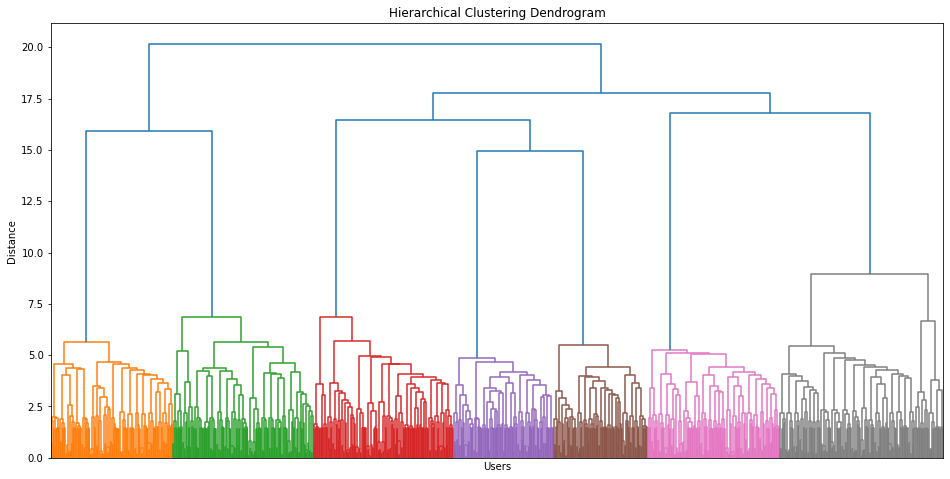

Wall time: 1.07 s


In [31]:
%%time
    
# calculate full dendrogram
plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.#,  # font size for the x axis labels
    #labels=features
)
# plt.axis('off')
plt.xticks([], [])
plt.show()

In [33]:
%%time
# 10000 объектов
Z = linkage(data[features].iloc[:10000], 'ward')

Wall time: 10.6 s


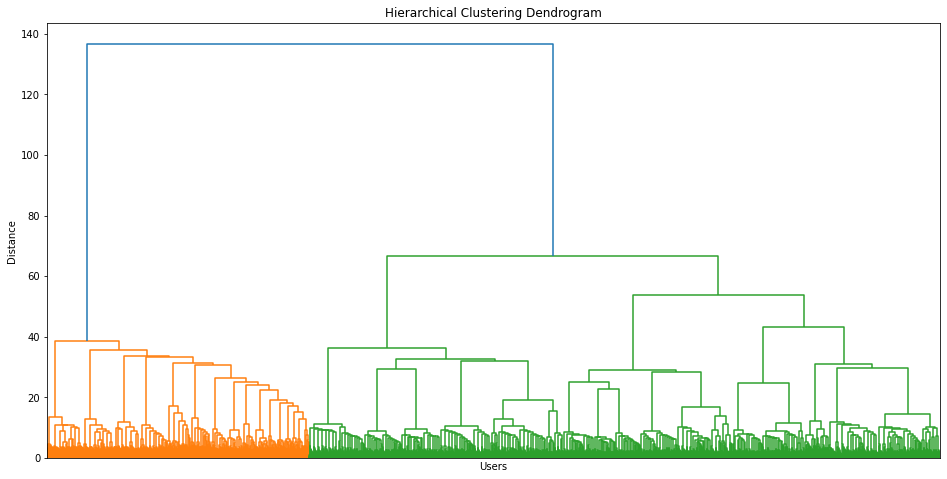

Wall time: 9.1 s


In [34]:
%%time
    
# calculate full dendrogram
plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.#,  # font size for the x axis labels
    #labels=features
)
# plt.axis('off')
plt.xticks([], [])
plt.show()

In [35]:
%%time
# 40000 тысяч объектов
Z = linkage(data[features].iloc[:40000], 'ward')

Wall time: 3min 30s


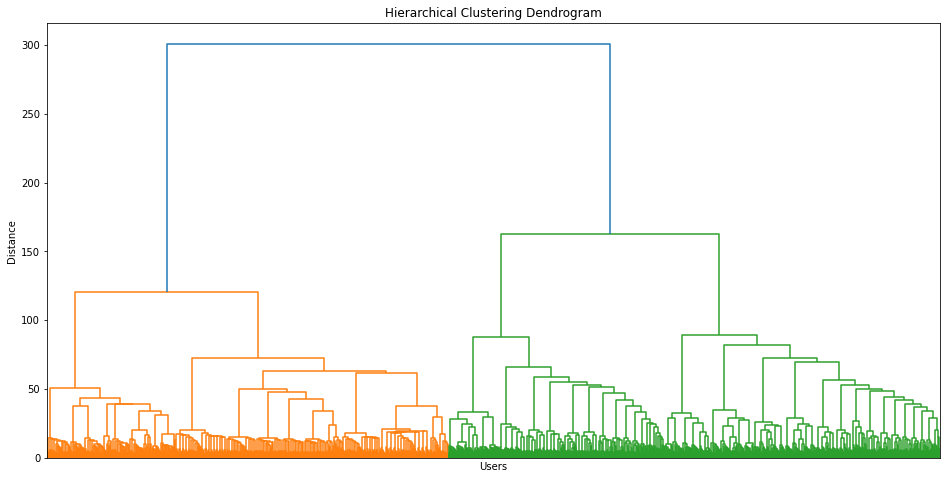

Wall time: 38.6 s


In [36]:
%%time
    
# calculate full dendrogram
plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.#,  # font size for the x axis labels
    #labels=features
)
# plt.axis('off')
plt.xticks([], [])
plt.show()

## Равномерно распределенная подвыборка

In [37]:
parts = 20
short_idx = [x for x in range(data.shape[0]) if x%parts == 0]
data_sample = data.iloc[short_idx]

In [38]:
%%time
Z = linkage(data_sample[features], 'ward')

Wall time: 56.4 s


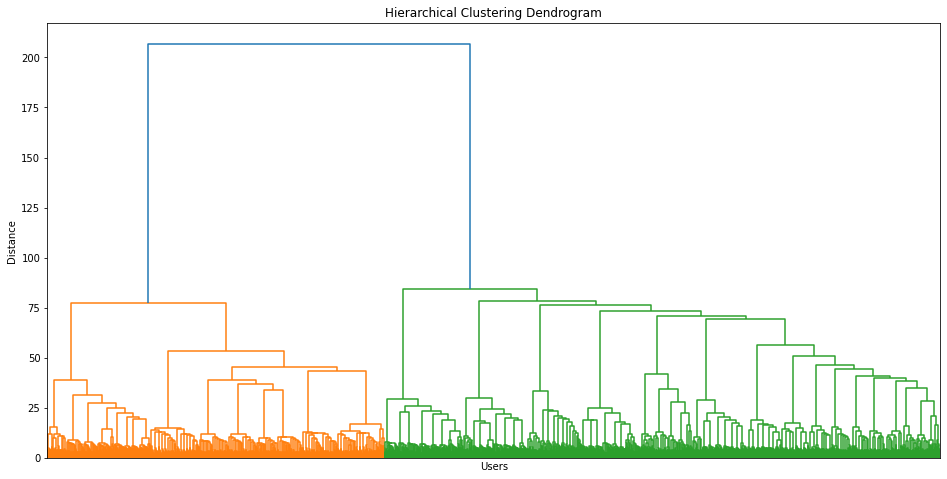

Wall time: 21.8 s


In [39]:
%%time
    
# calculate full dendrogram
plt.figure(figsize=(16, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.#,  # font size for the x axis labels
    #labels=features
)
# plt.axis('off')
plt.xticks([], [])
plt.show()

### Параментры кластеров

In [40]:
maxclust = 9
clusters = fcluster(Z, maxclust, criterion='maxclust')
data_sample['cluster'] = clusters

In [41]:
data_sample.groupby('cluster')[features[:4]].mean()

wd      hour   minutes  osv_number
cluster                                          
1        0.412365  0.588112  0.490559    0.731793
2        0.417586  0.547904  0.488029    0.691119
3        0.471514  0.558740  0.500562    0.691463
4        0.482911  0.580283  0.500822    0.728351
5        0.477859  0.525103  0.494693    0.696204
6        0.453093  0.572932  0.486790    0.698210
7        0.487023  0.578991  0.494501    0.955522
8        0.497460  0.577207  0.500873    0.746251
9        0.475560  0.560101  0.505523    0.707356

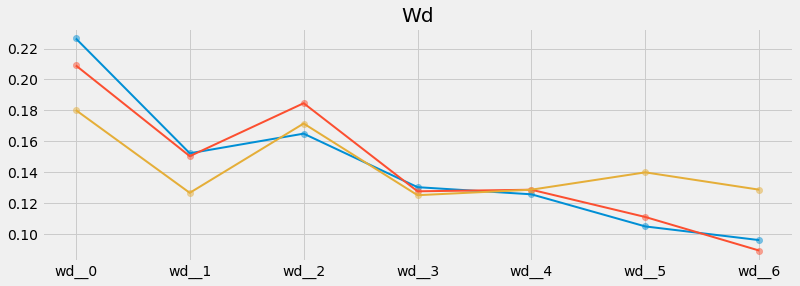

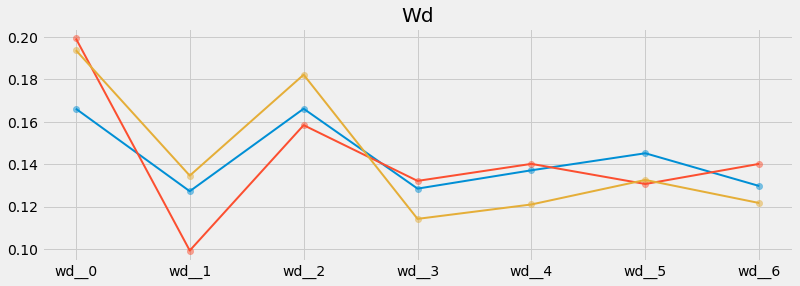

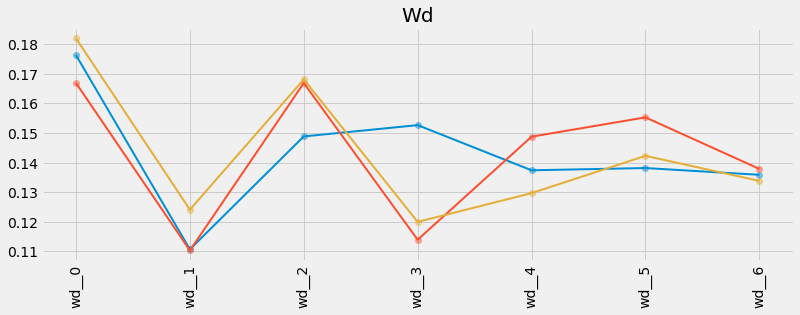

In [42]:
f = [x for x in features if 'wd_' in x]
new_figure = True

for i in range(1, maxclust + 1):
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Wd', new_figure=new_figure)
    new_figure = False
    
    if i%3 == 0:
        new_figure = True

plt.xticks(rotation=90);

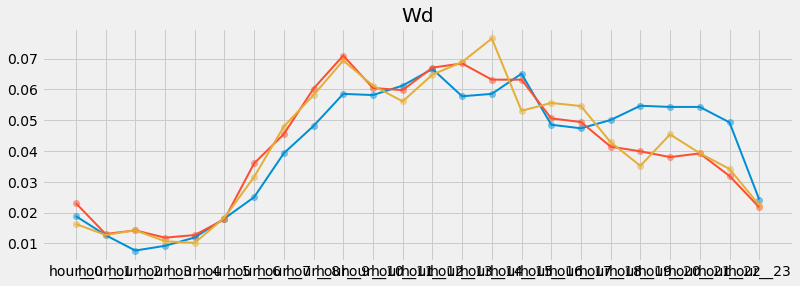

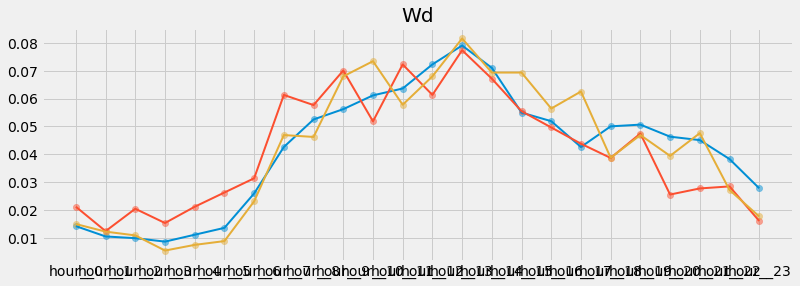

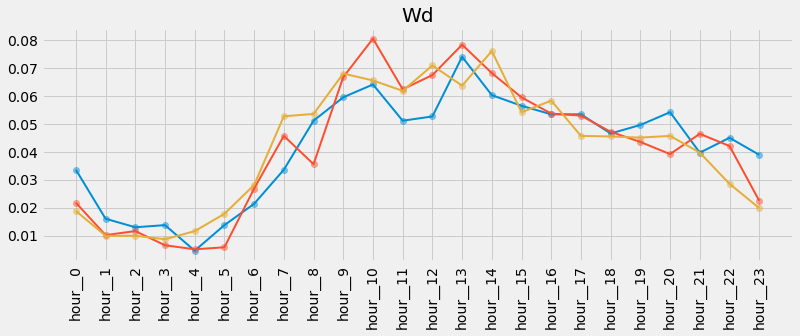

In [43]:
f = [x for x in data.columns if 'hour_' in x if x != 'hour_shift']

new_figure = True

for i in range(1, maxclust + 1):
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Wd', new_figure=new_figure)
    new_figure = False
    
    if i%3 == 0:
        new_figure = True

plt.xticks(rotation=90);

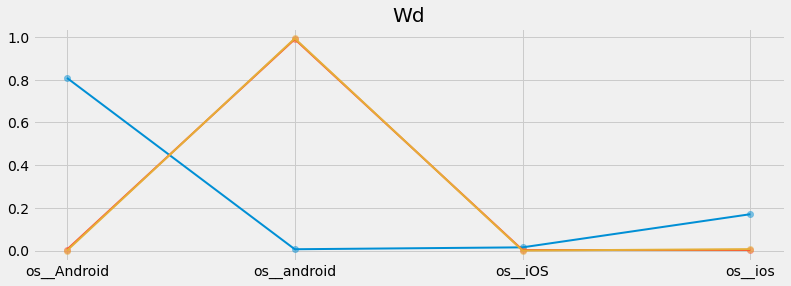

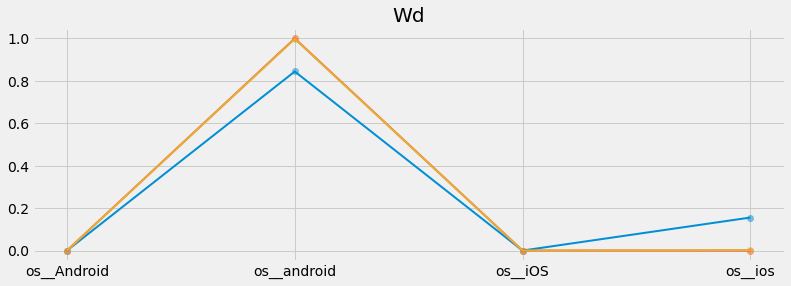

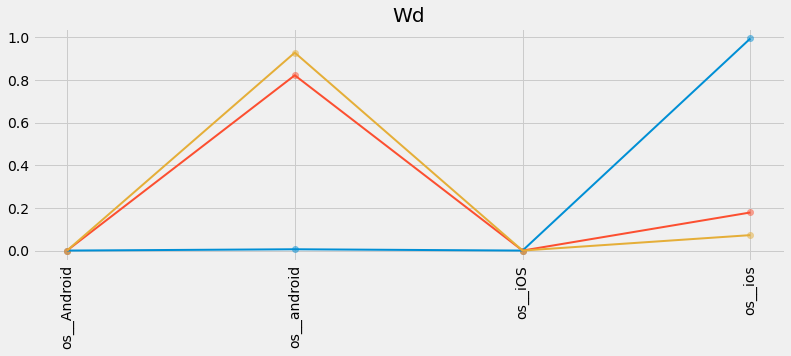

In [44]:
f = [x for x in features if 'os_' in x]

new_figure = True

for i in range(1, maxclust + 1):
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Wd', new_figure=new_figure)
    new_figure = False
    
    if i%3 == 0:
        new_figure = True

plt.xticks(rotation=90);

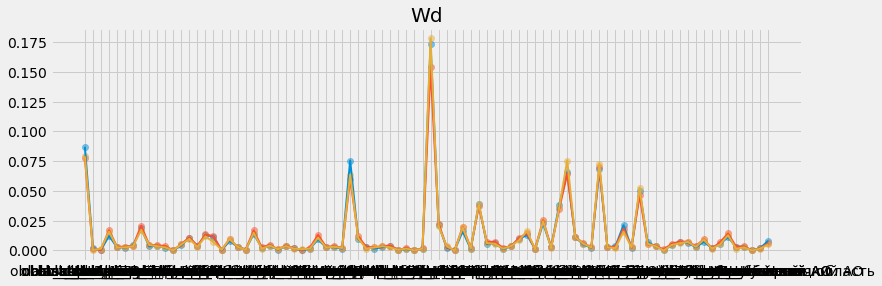

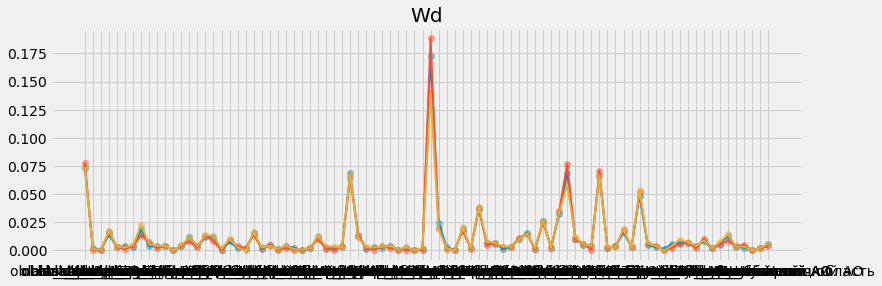

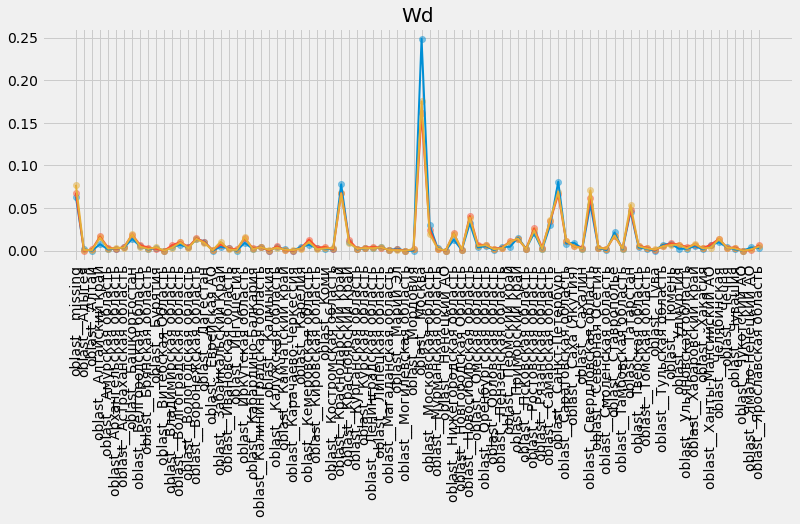

In [45]:
f = [x for x in features if 'oblast_' in x]

new_figure = True

for i in range(1, maxclust + 1):
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Wd', new_figure=new_figure)
    new_figure = False
    
    if i%3 == 0:
        new_figure = True

plt.xticks(rotation=90);

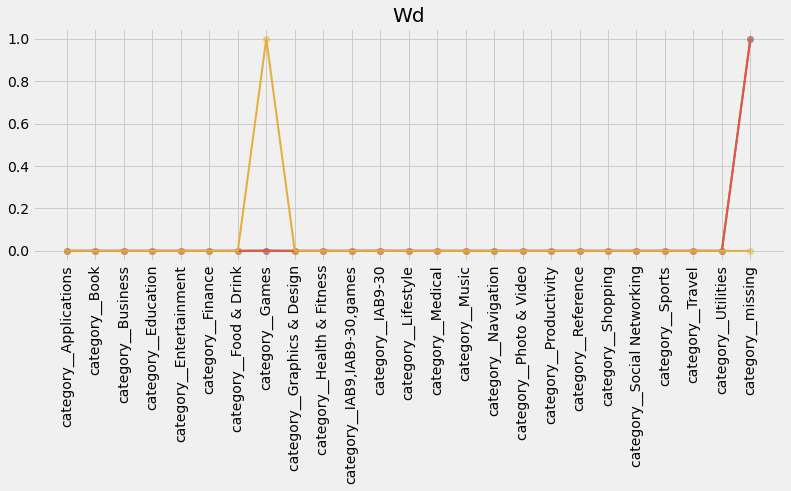

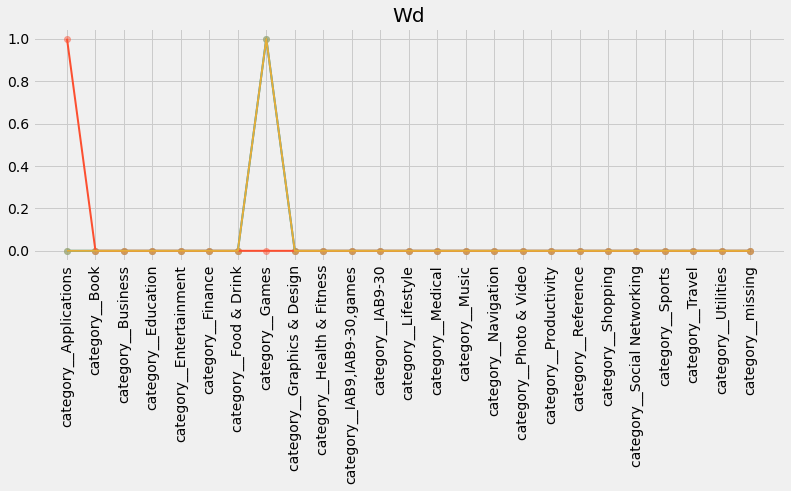

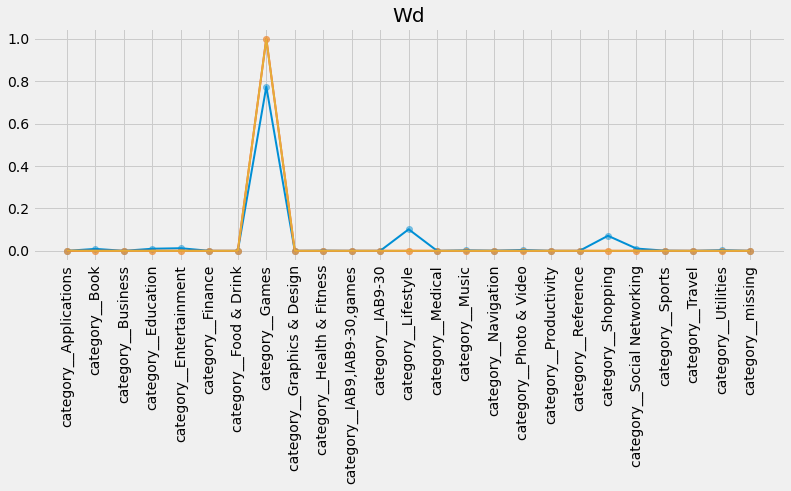

In [46]:
f = [x for x in data.columns if 'category_' in x and 'sub' not in x]

new_figure = True

for i in range(1, maxclust + 1):
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Wd', new_figure=new_figure)
    new_figure = False
    
    if i%3 == 0:
        new_figure = True
        plt.xticks(rotation=90);

plt.xticks(rotation=90);

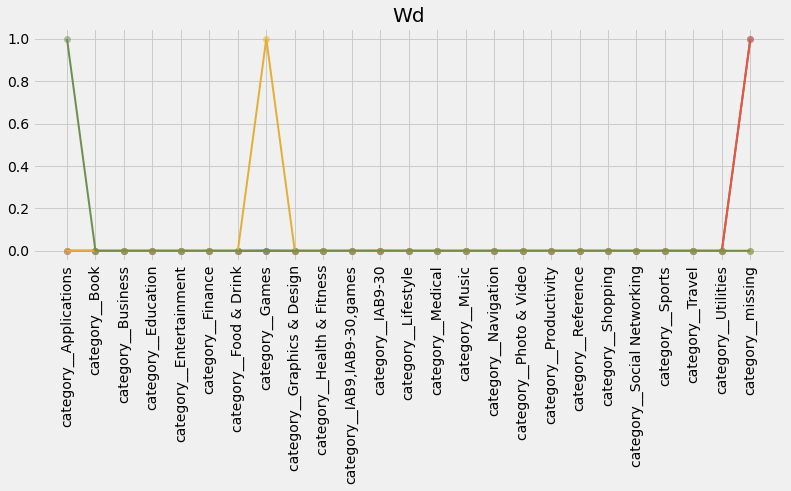

In [47]:
f = [x for x in data.columns if 'category_' in x and 'sub' not in x]

new_figure = True

for i in [1, 2, 8, 5]:
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Wd', new_figure=new_figure)
    new_figure = False
    
    if i%3 == 0:
        new_figure = True
        plt.xticks(rotation=90);

plt.xticks(rotation=90);

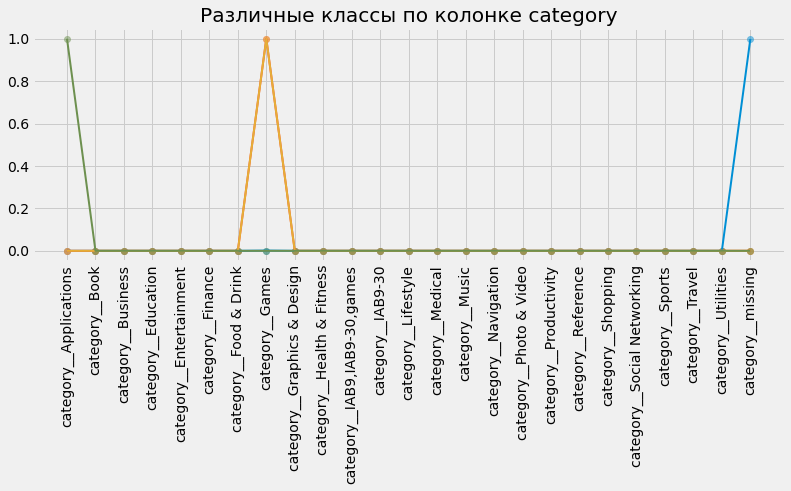

In [50]:
f = [x for x in data.columns if 'category_' in x and 'sub' not in x]

new_figure = True

for i in [1, 3, 8, 5]:
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Различные классы по колонке category', new_figure=new_figure)
    new_figure = False   


plt.xticks(rotation=90);

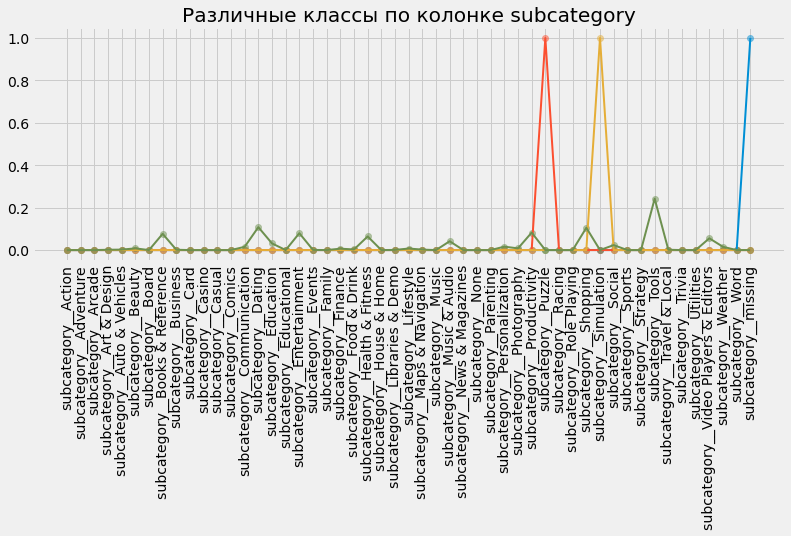

In [49]:
f = [x for x in data.columns if 'subcategory_' in x]

new_figure = True

for i in [1, 3, 8, 5]:
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Различные классы по колонке subcategory', new_figure=new_figure)
    new_figure = False    

plt.xticks(rotation=90);

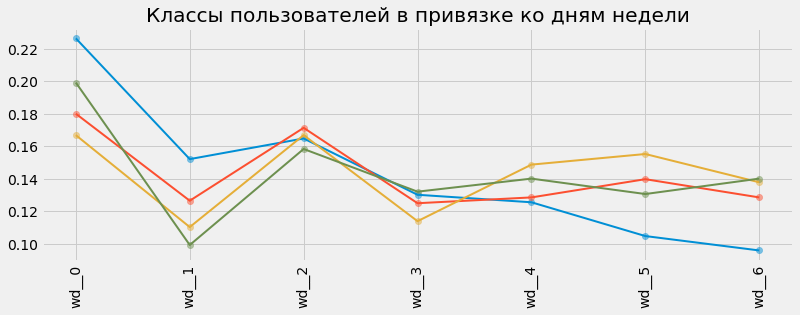

In [51]:
f = [x for x in data.columns if 'wd_' in x]

new_figure = True

for i in [1, 3, 8, 5]:
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Классы пользователей в привязке ко дням недели', new_figure=new_figure)
    new_figure = False

plt.xticks(rotation=90);

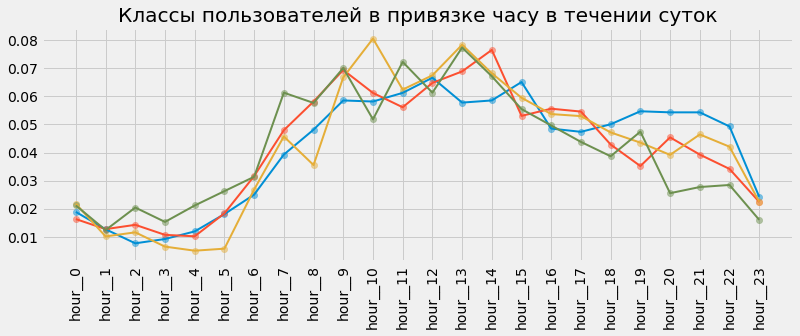

In [52]:
f = [x for x in data.columns if 'hour_' in x if x != 'hour_shift']

new_figure = True

for i in [1, 3, 8, 5]:
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Классы пользователей в привязке часу в течении суток', new_figure=new_figure)
    new_figure = False


plt.xticks(rotation=90);

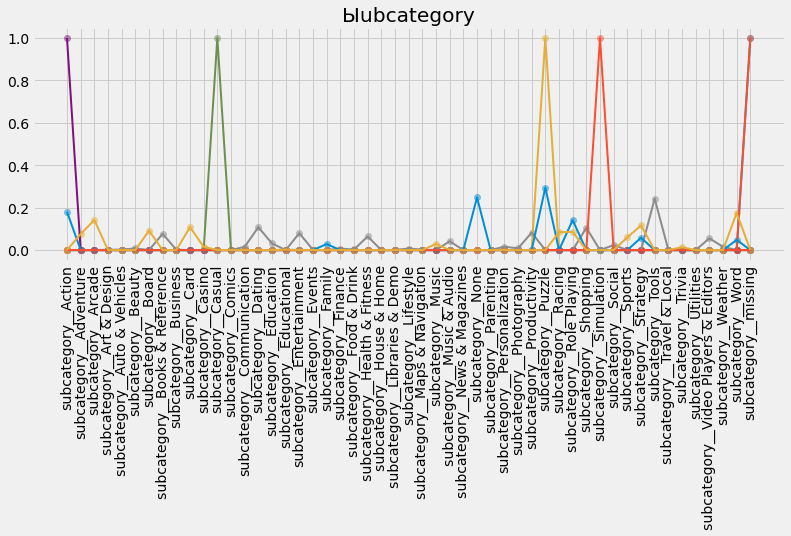

In [53]:
f = [x for x in data.columns if 'subcategory_' in x]

new_figure = True

for i in range(1, maxclust + 1):
    fast_plot(data_sample.groupby('cluster')[f].mean().T[i], title='Ыubcategory', new_figure=new_figure)
    new_figure = False

plt.xticks(rotation=90);

# Encoder

In [54]:
import torch
import torch.nn as nn 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import plotly
import plotly.express as px

In [78]:
with open('../data/processed/short_data.pcl', 'rb') as f:
    train = pickle.load(f)

# Генерация новых признаков

In [81]:
def new_features(data):
    cat_features = pd.get_dummies(data['gamecategory'], prefix='category_')
    subcat_features = pd.get_dummies(data['subgamecategory'], prefix='subcategory_')
    oblast_features = pd.get_dummies(data['oblast'], prefix='oblast_')
    os_features = pd.get_dummies(data['os'], prefix='os_')
    wd_features = pd.get_dummies(data['wd'], prefix='wd_')
    hour_features = pd.get_dummies(data['hour'], prefix='hour_')
    
    data['osv_number'] = data['osv'].apply(lambda x: x.split('.')[0])
    rate_versions = (data['osv_number'].value_counts()[data['osv_number'].value_counts() < 250]).index
    data['osv_number'][data['osv_number'].isin(rate_versions)] = -1
    data['osv_number'] = data['osv_number'].astype(int)
    
    data = pd.concat([data, cat_features, subcat_features, oblast_features, os_features, wd_features, hour_features], axis=1)
    return data

In [84]:
train.shape

(448543, 216)

In [83]:
train = new_features(train)

In [85]:
features = ['wd', 'hour', 'minutes', 'osv_number']
features = features + [x for x in train.columns if 'category_' in x]
features = features + [x for x in train.columns if 'subcategory_' in x]
features = features + [x for x in train.columns if 'oblast_' in x]
features = features + [x for x in train.columns if 'os_' in x]
features = features + [x for x in train.columns if 'wd_' in x]
features = features + [x for x in train.columns if 'hour_' in x if x != 'hour_shift']

features = list(set(features))
len(features)

201

## Scale

In [86]:
scaler = MinMaxScaler()
scaler.fit(train[features])
train[features] = scaler.transform(train[features])

In [87]:
len(features)

201

## Модель

In [88]:
class Autoencoder(nn.Module):
    
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(            
            nn.Linear(201, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), 
            nn.Linear(64, 32), 
            nn.ReLU(True), 
            nn.Linear(32, 16), 
            nn.ReLU(True), 
            nn.Linear(16, 8), 
            nn.Sigmoid()
        )        
        
        self.decoder = nn.Sequential( 
            nn.Linear(8, 16),
            nn.ReLU(True),
            nn.Linear(16, 32),
            nn.ReLU(True),
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 201), 
            nn.Tanh()    
            #nn.Sigmoid()    
        ) 
        
        self.scorer = nn.Sequential(
            nn.Tanh()    
        )

        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [89]:
torch.manual_seed(1)
train_batch_size = 128 * 2

train_loader = torch.utils.data.DataLoader(train[features].to_numpy(), batch_size=train_batch_size, 
                                           shuffle=False, num_workers=1)

In [90]:
torch.manual_seed(0)

num_epochs = 9
learning_rate = 1e-3

model = Autoencoder().cpu()
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-7, lr=learning_rate)

for epoch in range(num_epochs):    
    for data in train_loader:   
        data_tensor = torch.tensor(data.view(-1, 201)).cpu()        
        # ===================forward=====================
        output = model(data_tensor.float())
        loss = distance(output, data.float())
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss))

epoch [1/9], loss:0.0199
epoch [2/9], loss:0.0169
epoch [3/9], loss:0.0167
epoch [4/9], loss:0.0157
epoch [5/9], loss:0.0148
epoch [6/9], loss:0.0151
epoch [7/9], loss:0.0131
epoch [8/9], loss:0.0158
epoch [9/9], loss:0.0162


In [91]:
encoder = model.encoder
decoder = model.decoder

In [92]:
train_bottle_nec = []

#for epoch in range(num_epochs):
for data in train_loader:
    data_tensor = torch.tensor(data.view(-1, 201)).cpu()
    # ===================forward=====================
    output = encoder(data_tensor.float())
    train_bottle_nec.extend(output.detach().numpy())   
    
train_bottle_nec = np.concatenate(train_bottle_nec, axis=0).reshape(-1, 8)

In [93]:
columns = [f'x{x}' for x in range(1, train_bottle_nec.shape[1] + 1)]
df = pd.DataFrame(train_bottle_nec, columns=columns)
df['Segment'] = train['Segment'].values
df

x1        x2        x3        x4        x5        x6        x7  \
0       0.001061  0.999999  0.969693  0.995370  0.000082  0.000039  0.000044   
1       0.001152  0.999999  0.968493  0.995047  0.000092  0.000044  0.000050   
2       0.001047  0.999999  0.969916  0.995419  0.000080  0.000038  0.000044   
3       0.001006  0.999999  0.970527  0.995565  0.000076  0.000036  0.000041   
4       0.001033  0.999999  0.970061  0.995469  0.000079  0.000037  0.000043   
...          ...       ...       ...       ...       ...       ...       ...   
448538  0.000411  0.550772  0.008071  0.000043  0.995068  0.992481  0.023527   
448539  0.000360  0.552747  0.007435  0.000036  0.995488  0.993109  0.022159   
448540  0.000632  0.547861  0.010524  0.000074  0.993472  0.990009  0.028667   
448541  0.002521  0.999994  0.953475  0.990630  0.000280  0.000138  0.000159   
448542  0.002285  0.999995  0.955642  0.991348  0.000244  0.000119  0.000138   

              x8  Segment  
0       0.000114        1  
1       0.000127        1  
2       0.000112        1  
3       0.000106        1  
4       0.000110        1  
...          ...      ...  
448538  0.985055        5  
448539  0.986026        5  
448540  0.981261        5  
448541  0.000367        5  
448542  0.000322        5  

[448543 rows x 9 columns]

In [94]:
df['Пол'] = 'М, Ж'
df['Пол'][df['Segment'].isin([1, 3])] = 'Ж'
df['Пол'][df['Segment'] == 2] = 'М'

In [95]:
df['Пол'].value_counts()

М, Ж    283294
Ж       151087
М        14162
Name: Пол, dtype: int64

In [96]:
train_bottle_nec = []

#for epoch in range(num_epochs):
for data in train_loader:
    data_tensor = torch.tensor(data.view(-1, 201)).cpu()
    # ===================forward=====================
    output = encoder(data_tensor.float())
    train_bottle_nec.extend(output.detach().numpy())   
    
train_bottle_nec = np.concatenate(train_bottle_nec, axis=0).reshape(-1, 8)

In [97]:
columns = [f'x{x}' for x in range(1, train_bottle_nec.shape[1] + 1)]
df = pd.DataFrame(train_bottle_nec, columns=columns)
df['Segment'] = train['Segment'].values
df

x1        x2        x3        x4        x5        x6        x7  \
0       0.001061  0.999999  0.969693  0.995370  0.000082  0.000039  0.000044   
1       0.001152  0.999999  0.968493  0.995047  0.000092  0.000044  0.000050   
2       0.001047  0.999999  0.969916  0.995419  0.000080  0.000038  0.000044   
3       0.001006  0.999999  0.970527  0.995565  0.000076  0.000036  0.000041   
4       0.001033  0.999999  0.970061  0.995469  0.000079  0.000037  0.000043   
...          ...       ...       ...       ...       ...       ...       ...   
448538  0.000411  0.550772  0.008071  0.000043  0.995068  0.992481  0.023527   
448539  0.000360  0.552747  0.007435  0.000036  0.995488  0.993109  0.022159   
448540  0.000632  0.547861  0.010524  0.000074  0.993472  0.990009  0.028667   
448541  0.002521  0.999994  0.953475  0.990630  0.000280  0.000138  0.000159   
448542  0.002285  0.999995  0.955642  0.991348  0.000244  0.000119  0.000138   

              x8  Segment  
0       0.000114        1  
1       0.000127        1  
2       0.000112        1  
3       0.000106        1  
4       0.000110        1  
...          ...      ...  
448538  0.985055        5  
448539  0.986026        5  
448540  0.981261        5  
448541  0.000367        5  
448542  0.000322        5  

[448543 rows x 9 columns]

# Возраст

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
columns = [f'x{x}' for x in range(1, train_bottle_nec.shape[1] + 1)]
df = pd.DataFrame(train_bottle_nec, columns=columns)
df['Segment'] = train['Segment'].values
df

x1        x2        x3        x4        x5        x6        x7  \
0       0.001061  0.999999  0.969693  0.995370  0.000082  0.000039  0.000044   
1       0.001152  0.999999  0.968493  0.995047  0.000092  0.000044  0.000050   
2       0.001047  0.999999  0.969916  0.995419  0.000080  0.000038  0.000044   
3       0.001006  0.999999  0.970527  0.995565  0.000076  0.000036  0.000041   
4       0.001033  0.999999  0.970061  0.995469  0.000079  0.000037  0.000043   
...          ...       ...       ...       ...       ...       ...       ...   
448538  0.000411  0.550772  0.008071  0.000043  0.995068  0.992481  0.023527   
448539  0.000360  0.552747  0.007435  0.000036  0.995488  0.993109  0.022159   
448540  0.000632  0.547861  0.010524  0.000074  0.993472  0.990009  0.028667   
448541  0.002521  0.999994  0.953475  0.990630  0.000280  0.000138  0.000159   
448542  0.002285  0.999995  0.955642  0.991348  0.000244  0.000119  0.000138   

              x8  Segment  
0       0.000114        1  
1       0.000127        1  
2       0.000112        1  
3       0.000106        1  
4       0.000110        1  
...          ...      ...  
448538  0.985055        5  
448539  0.986026        5  
448540  0.981261        5  
448541  0.000367        5  
448542  0.000322        5  

[448543 rows x 9 columns]

In [112]:
feat = [x for x in df.columns if 'x' in x]

In [113]:
df['Возраст'] = '25-34,35-41'
df['Возраст'][df['Segment'].isin([4, 5])] = '18-24,25-34,35-41'

In [114]:
df['Возраст'].value_counts()

18-24,25-34,35-41    283294
25-34,35-41          165249
Name: Возраст, dtype: int64

In [115]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(df[feat], df['Возраст'])

DecisionTreeClassifier(max_depth=6)

In [116]:
dict(zip(feat, model.feature_importances_))

{'x1': 0.009600416344864908,
 'x2': 0.012121060686181878,
 'x3': 0.025152809991304877,
 'x4': 0.0085587388252499,
 'x5': 0.10042130551923743,
 'x6': 0.010534785369988505,
 'x7': 0.10604389624795597,
 'x8': 0.7275669870152166}

In [117]:
age1 = df[df['Возраст'] == '25-34,35-41']
age2 = df[df['Возраст'] != '25-34,35-41'].sample(age1.shape[0])

ages = pd.concat([age1, age2])

In [118]:
parts = 100
short_idx = [x for x in range(ages.shape[0]) if x%parts == 0]
df_sample = ages.iloc[short_idx]
df_sample

x1        x2        x3            x4        x5            x6  \
0       0.001061  0.999999  0.969693  9.953703e-01  0.000082  3.884252e-05   
100     0.000446  0.999999  0.000446  9.999542e-01  0.000009  5.564572e-06   
200     0.000010  0.025170  0.000002  9.564687e-07  0.998838  9.995883e-01   
300     0.000377  0.552176  0.007647  3.840919e-05  0.995349  9.928995e-01   
400     0.000142  1.000000  0.000089  9.999914e-01  0.000001  9.017083e-07   
...          ...       ...       ...           ...       ...           ...   
375769  0.222403  0.492958  0.324888  1.557589e-01  0.727901  6.278919e-01   
444089  0.158383  0.960694  0.693786  7.559198e-01  0.112846  6.918970e-02   
431038  0.367688  0.487207  0.428223  3.134514e-01  0.626319  5.125601e-01   
388016  0.000073  0.039279  0.000005  1.938758e-05  0.994468  9.976829e-01   
350845  0.358308  0.487512  0.422045  3.024217e-01  0.632540  5.193145e-01   

              x7            x8  Segment            Возраст  
0       0.000044  1.138192e-04        1        25-34,35-41  
100     0.007865  5.445939e-06        1        25-34,35-41  
200     0.002918  9.999204e-01        1        25-34,35-41  
300     0.022622  9.856966e-01        1        25-34,35-41  
400     0.004828  8.166207e-07        1        25-34,35-41  
...          ...           ...      ...                ...  
375769  0.342565  6.722496e-01        5  18-24,25-34,35-41  
444089  0.081019  1.108086e-01        5  18-24,25-34,35-41  
431038  0.421163  5.843890e-01        5  18-24,25-34,35-41  
388016  0.010214  9.995546e-01        5  18-24,25-34,35-41  
350845  0.416511  5.896354e-01        5  18-24,25-34,35-41  

[3305 rows x 10 columns]

In [119]:
fig = px.scatter_3d(df_sample, x='x5', y='x7', z='x8',
                    color='Возраст')
fig.show()

## Работа с полом

In [121]:
df['Пол'] = 'Ж'
df['Пол'][df['Segment'] == 2] = 'М'
df['Пол'][df['Segment'].isin([4,5])] = 'М, Ж'

In [122]:
sex1 = df[df['Пол'] == 'М']
sex2 = df[df['Пол'] == 'Ж'].sample(sex1.shape[0])
sex3 = df[df['Пол'] == 'М, Ж'].sample(sex1.shape[0])

sex = pd.concat([sex1, sex2, sex3])

In [123]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(sex[feat], sex['Пол'])

DecisionTreeClassifier(max_depth=6)

In [125]:
dict(zip(feat, model.feature_importances_))

{'x1': 0.016980394305745213,
 'x2': 0.0418092769314156,
 'x3': 0.2904632469342157,
 'x4': 0.04686934169459505,
 'x5': 0.06994737165839435,
 'x6': 0.005559089237133582,
 'x7': 0.03550828449031818,
 'x8': 0.4928629947481823}

In [126]:
parts = 10
short_idx = [x for x in range(sex.shape[0]) if x%parts == 0]
df_sample = sex.iloc[short_idx]
df_sample['Segment'] = df_sample['Segment'].astype(str)
df_sample

x1        x2        x3        x4        x5        x6        x7  \
9217    0.000512  0.999998  0.000576  0.999943  0.000011  0.000007  0.008061   
9227    0.000381  0.999999  0.000297  0.999966  0.000007  0.000004  0.008104   
9237    0.023760  0.993681  0.000003  0.999594  0.001688  0.001284  0.918665   
9247    0.022167  0.994135  0.000002  0.999673  0.001458  0.001112  0.928230   
9257    0.018701  0.995726  0.000002  0.999734  0.001122  0.000857  0.918267   
...          ...       ...       ...       ...       ...       ...       ...   
357023  0.450166  0.545970  0.512796  0.475341  0.513160  0.394248  0.436498   
194053  0.336023  0.488444  0.407160  0.276555  0.647540  0.535638  0.405344   
421186  0.001547  0.999987  0.001100  0.999786  0.000058  0.000038  0.020766   
220711  0.240986  0.492216  0.339322  0.174087  0.714107  0.611478  0.353743   
367419  0.355621  0.487597  0.420267  0.299281  0.634326  0.521263  0.415170   

              x8 Segment            Возраст   Пол  
9217    0.000007       2        25-34,35-41     М  
9227    0.000004       2        25-34,35-41     М  
9237    0.000733       2        25-34,35-41     М  
9247    0.000618       2        25-34,35-41     М  
9257    0.000474       2        25-34,35-41     М  
...          ...     ...                ...   ...  
357023  0.480111       5  18-24,25-34,35-41  М, Ж  
194053  0.602157       4  18-24,25-34,35-41  М, Ж  
421186  0.000038       5  18-24,25-34,35-41  М, Ж  
220711  0.659833       4  18-24,25-34,35-41  М, Ж  
367419  0.591148       5  18-24,25-34,35-41  М, Ж  

[4249 rows x 11 columns]

In [129]:
fig = px.scatter_3d(sex, x='x2', y='x3', z='x8',
                    color='Пол')
fig.show()

# Save model

In [293]:
torch.save(encoder, 'encoder_model.pth')

# Batch inference

In [252]:
with open('../data/processed/data_sorted.pcl', 'rb') as f:
    train_sorted = pickle.load(f)

In [265]:
def new_features(data):
    cat_features = pd.get_dummies(data['gamecategory'], prefix='category_')
    subcat_features = pd.get_dummies(data['subgamecategory'], prefix='subcategory_')
    oblast_features = pd.get_dummies(data['oblast'], prefix='oblast_')
    os_features = pd.get_dummies(data['os'], prefix='os_')
    wd_features = pd.get_dummies(data['wd'], prefix='wd_')
    hour_features = pd.get_dummies(data['hour'], prefix='hour_')
    
    data['osv_number'] = data['osv'].apply(lambda x: x.split('.')[0])
    rate_versions = (data['osv_number'].value_counts()[data['osv_number'].value_counts() < 250]).index
    data['osv_number'][data['osv_number'].isin(rate_versions)] = -1
    data['osv_number'] = data['osv_number'].astype(int)
    
    data = pd.concat([data, cat_features, subcat_features, oblast_features, os_features, wd_features, hour_features], axis=1)
    return data

In [253]:
train_sorted.shape

(44854283, 18)

### Train

In [282]:
%%time
step_size = 1000000
data_size = train_sorted.shape[0]
steps = int(np.ceil(data_size / step_size))

inference_batch_size = 10000

for step in range(steps):
    start = step * step_size
    end = min((step + 1) * step_size, data_size)
    print(start, end)
    df = train_sorted.iloc[start: end]
    df = new_features(df)
    missing_features = [x for x in features if x not in df.columns]
    df[missing_features] = 0    

    
    inference_loader = torch.utils.data.DataLoader(df[features].to_numpy(), batch_size=inference_batch_size,
                                                   shuffle=False, num_workers=1)    
    bottle_nec = []

    for data in inference_loader:
        data_tensor = torch.tensor(data.view(-1, 201)).cpu()
        # ===================forward=====================
        output = encoder(data_tensor.float())
        bottle_nec.extend(output.detach().numpy())   
    
    bottle_nec = np.concatenate(bottle_nec, axis=0).reshape(-1, 8)
    columns = [f'x{x}' for x in range(1, bottle_nec.shape[1] + 1)]
    
    result = pd.DataFrame(index=df.index, data=bottle_nec, columns=columns)
    result.to_csv(f'encoding/train_step_{step}.csv')

0 1000000
1000000 2000000
2000000 3000000
3000000 4000000
4000000 5000000
5000000 6000000
6000000 7000000
7000000 8000000
8000000 9000000
9000000 10000000
10000000 11000000
11000000 12000000
12000000 13000000
13000000 14000000
14000000 15000000
15000000 16000000
16000000 17000000
17000000 18000000
18000000 19000000
19000000 20000000
20000000 21000000
21000000 22000000
22000000 23000000
23000000 24000000
24000000 25000000
25000000 26000000
26000000 27000000
27000000 28000000
28000000 29000000
29000000 30000000
30000000 31000000
31000000 32000000
32000000 33000000
33000000 34000000
34000000 35000000
35000000 36000000
36000000 37000000
37000000 38000000
38000000 39000000
39000000 40000000
40000000 41000000
41000000 42000000
42000000 43000000
43000000 44000000
44000000 44854283
Wall time: 11min 26s


### Test

In [283]:
test = pd.read_csv('../data/raw/test.csv', parse_dates=['created'])

In [284]:
def get_time_features(data):
    data['hour_shift'] = data['shift'].apply(lambda x: x.replace('MSK', ''))
    data['hour_shift'] = data['hour_shift'].replace({'': 0, 'missing': 0}).astype('int8')
    
    data['local_time'] = data['created'] + pd.to_timedelta('1H') * data['hour_shift']
    data['month'] = data['local_time'].dt.month.astype('int8')
    data['date'] = data['local_time'].dt.date
    data['day'] = data['local_time'].dt.day.astype('int8')
    data['wd'] = data['local_time'].dt.weekday.astype('int8')
    data['hour'] = data['local_time'].dt.hour.astype('int8')
    data['minutes'] = data['local_time'].dt.minute.astype('int8')
    return data

In [286]:
test

gamecategory   subgamecategory  \
0         Applications          Shopping   
1                  NaN               NaN   
2                  NaN               NaN   
3                  NaN               NaN   
4         Applications  Health & Fitness   
...                ...               ...   
11213624           NaN               NaN   
11213625           NaN               NaN   
11213626  Applications  Health & Fitness   
11213627           NaN               NaN   
11213628           NaN               NaN   

                                                                       bundle  \
0                                                         com.allgoritm.youla   
1                                                 com.ChocochocoStd.RapBattle   
2                                                                  1387897651   
3         com.cooking.family.diary.fever.food.city.craze.dream.kitchen.frenzy   
4                                           com.pedometer.stepcounter.tracker   
...                                                                       ...   
11213624                                          com.phonemaster.jewelhunter   
11213625                                            com.linkdesks.jewellegend   
11213626                                    com.pedometer.stepcounter.tracker   
11213627                                                com.onebutton.mrsuper   
11213628                                                      com.pixonic.wwr   

                     created  shift                oblast              city  \
0        2021-09-19 17:31:33  MSK+2  Свердловская область      Екатеринбург   
1        2021-08-03 17:13:17  MSK+2     Ямало-Ненецкий АО     Новый Уренгой   
2        2021-09-17 15:54:00    MSK                Москва            Москва   
3        2021-07-05 23:34:59    MSK    Краснодарский край         Краснодар   
4        2021-07-08 15:15:21    MSK             Татарстан  Набережные Челны   
...                      ...    ...                   ...               ...   
11213624 2021-08-04 05:55:26    MSK       Санкт-Петербург   Санкт-Петербург   
11213625 2021-09-17 21:45:02    MSK           Ставрополье         Пятигорск   
11213626 2021-07-08 10:24:31  MSK+6    Забайкальский Край              Чита   
11213627 2021-07-05 16:02:47  MSK+2          Башкортостан          Белорецк   
11213628 2021-08-07 11:49:54  MSK+2         Пермский край             Пермь   

               os     osv  
0         android    10.0  
1         android    10.0  
2             ios  14.4.0  
3         android   9.0.0  
4         android    10.0  
...           ...     ...  
11213624  android   8.1.0  
11213625  android      10  
11213626  android    11.0  
11213627  android   6.0.1  
11213628  android  11.0.0  

[11213629 rows x 9 columns]

In [287]:
%%time
test = test.fillna('missing')
test = get_time_features(test)
test.shape

Wall time: 45.5 s


(11213629, 17)

In [288]:
%%time
step_size = 1000000
data_size = test.shape[0]
steps = int(np.ceil(data_size / step_size))

inference_batch_size = 10000

for step in range(steps):
    start = step * step_size
    end = min((step + 1) * step_size, data_size)
    print(start, end)
    df = test.iloc[start: end]
    df = new_features(df)
    missing_features = [x for x in features if x not in df.columns]
    df[missing_features] = 0    

    
    inference_loader = torch.utils.data.DataLoader(df[features].to_numpy(), batch_size=inference_batch_size,
                                                   shuffle=False, num_workers=1)    
    bottle_nec = []

    for data in inference_loader:
        data_tensor = torch.tensor(data.view(-1, 201)).cpu()
        # ===================forward=====================
        output = encoder(data_tensor.float())
        bottle_nec.extend(output.detach().numpy())   
    
    bottle_nec = np.concatenate(bottle_nec, axis=0).reshape(-1, 8)
    columns = [f'x{x}' for x in range(1, bottle_nec.shape[1] + 1)]
    
    result = pd.DataFrame(index=df.index, data=bottle_nec, columns=columns)
    result.to_csv(f'encoding/test_step_{step}.csv')

0 1000000
1000000 2000000
2000000 3000000
3000000 4000000
4000000 5000000
5000000 6000000
6000000 7000000
7000000 8000000
8000000 9000000
9000000 10000000
10000000 11000000
11000000 11213629
Wall time: 2min 50s
